# Regression
 * 线性回归
 * 局部加权线性回归
 * 岭回归和逐步线性回归
 * 预测鲍鱼年龄和玩具售价

## 普通最小二乘法（ordinary least squares,OLS）

In [5]:
from numpy import *

In [6]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

# 用来计算最佳拟合直线
def standRegres(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print 'This matrix is singular, cannot do inverse'
        return
    # NumPy的线性代数库还提供一个函数来解未知矩阵，如果使用该函数，
    # 那么代码ws=xTx.I *(xMat.T*yMat)应写成
    # ws=linalg.solve(xTx, xMat.T*yMatT)
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [11]:
xArr, yArr = loadDataSet('ex0.txt')
xArr[0:2], yArr[0:2]

([[1.0, 0.067732], [1.0, 0.42781]], [3.176513, 3.816464])

In [12]:
ws = standRegres(xArr, yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

In [25]:
import matplotlib.pyplot as plt

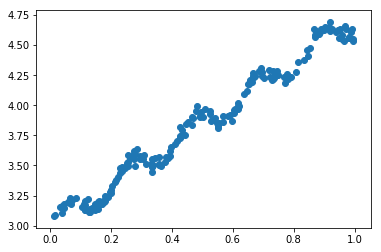

In [43]:
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

# 创建图像并绘出原始的数据
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])

plt.show()

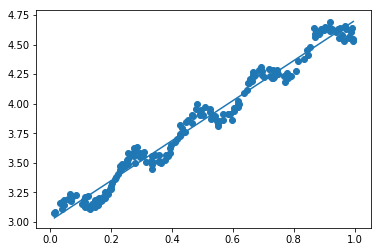

In [45]:
# %matplotlib inline
# import matplotlib.pyplot as plt  
xMat = mat(xArr)
yMat = mat(yArr)
yHat = xMat * ws

# 创建图像并绘出原始的数据
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
# 绘制计算出的最佳拟合直线
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
# 需要绘出yHat的值
ax.plot(xCopy[:, 1], yHat)

plt.show()

In [47]:
# 通过命令corrcoef(yEstimate,yActual)来计算预测值和真实值的相关性
yHat = xMat*ws
corrcoef(yHat.T, yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

## 局部加权线性回归（Locally Weighted Linear Regression， LWLR）

In [2]:
def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    m = shape(xMat)[0]
    # 创建对角矩阵
    weights = mat(eye((m)))
    for j in range(m):
        # 权重值大小以指数级衰减
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print 'This matrix is singular, cannot do inverse'
        return 
    # .I 是什么意思
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

In [7]:
xArr, yArr = loadDataSet('ex0.txt')

print yArr[0]
print lwlr(xArr[0], xArr, yArr, 1.0)
lwlr(xArr[0], xArr, yArr, 0.001)

3.176513
[[3.12204471]]


matrix([[3.20175729]])

In [8]:
# 为了得到数据集里所有点的估计，可以调用lwlrTest()函数
yHat = lwlrTest(xArr, xArr, yArr, 0.003)
# 先对xArr排序
xMat = mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]
# 然后用Matplotlib绘图
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd])
ax.scatter(xMat[:, 1].flatten().A[0], mat(yArr).T.flatten().A[0], s=2, c='red')
plt.show()

<Figure size 640x480 with 1 Axes>

## 缩减系数来“理解”数据
 * 岭回归
 * lasso法
 * 前向逐步回归

### 岭回归（ridge regression）

In [ ]:
def ridgeRegres(xMat, yMat, lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + eye(shape(xMat)[1])*lam
    if linalg.det(denom) == 0.0:
        print 'This matrix is singular, cannot do inverse'
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

def ridgeTest(xArr, yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 数据标准化
    # 所有特征都减去各自的均值并除以方差
    yMean = mean(yMat, 0)
    yMat = yMat - yMean
    xMeans = mean(xMat, 0)
    xVar = var(xMat,0)
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = zeros(numTestPts, shape(xMat)[1])
    for i in range(numTestPts):
        ws = ridgeRegres(xMat, yMat, exp(i-10))
        wMat[i, :]=ws.T
    return wMat

### 前向逐步回归

In [ ]:
def stageWise(xArr, yArr, eps=0.01, numIt=100):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m, n = shape(xMat)
    returnMat = zeros((numIt,n))
    ws = zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print ws.T
        lowesError = inf
        for j in range(n):
            for sign in [-1, 1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A, yTest.A)
                if rssE < lowestError:
                    lowestError - rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i, :]=ws.T
    return returnMat